In [ ]:
 ! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hritik2000","key":"d3f623fc07a3d1202560a6ddb6c05cd4"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset          Customer Shopping Trends Dataset                   146KB  2023-10-05 06:45:37          18328        395  1.0              
redpen12/employees-satisfaction-analysis                    Employee Satisfaction Survey Data                  140KB  2023-11-03 08:56:49            917         27  1.0              
nelgiriyewithana/billionaires-statistics-dataset            Billionaires Statistics Dataset (2023)             139KB  2023-09-29 13:39:28           9966        246  1.0              
joebeachcapital/30000-spotify-songs                         30000 Spotify Songs      

In [ ]:
! mkdir dataset

In [ ]:
!kaggle datasets download -d hritik2000/rice-leaf-disease-dataset

 78% 57.0M/73.0M [00:00<00:00, 78.4MB/s]
100% 73.0M/73.0M [00:00<00:00, 86.5MB/s]


In [ ]:
! unzip rice-leaf-disease-dataset.zip -d dataset

Archive:  rice-leaf-disease-dataset.zip
  inflating: dataset/dataset/test/bacterial_leaf_blight-115-_JPG.rf.67a9edc664988aeadc97b2722c69b1ee.jpg  
  inflating: dataset/dataset/test/bacterial_leaf_blight-119-_JPG.rf.75165b556900f4b4dd214697c28f0331.jpg  
  inflating: dataset/dataset/test/bacterial_leaf_blight-132-_JPG.rf.756a5841afc88adcbc198fc2e7e39809.jpg  
  inflating: dataset/dataset/test/bacterial_leaf_blight-137-_JPG.rf.2e900891f052753632c0abea659f3692.jpg  
  inflating: dataset/dataset/test/bacterial_leaf_blight-153-_JPG.rf.eb858f091ca839d2d60ae4cb6fa7a103.jpg  
  inflating: dataset/dataset/test/bacterial_leaf_blight-162-_JPG.rf.cec8377e4634d3b70ef1979874472a1f.jpg  
  inflating: dataset/dataset/test/bacterial_leaf_blight-17-_JPG.rf.95bb1967e4dd8e93e3e6b5b3aea64db0.jpg  
  inflating: dataset/dataset/test/bacterial_leaf_blight-18-_JPG.rf.b5dd281653bc2fc124879829d5d1912e.jpg  
  inflating: dataset/dataset/test/bacterial_leaf_blight-184-_jpg.rf.6fd646447155583fdcf0e7ae51443b4c.jpg  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [ ]:
train_datagen = ImageDataGenerator(zoom_range = 0.5,shear_range = 0.3,horizontal_flip = True,preprocessing_function = preprocess_input)

val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [ ]:
train = train_datagen.flow_from_directory(directory = "/content/dataset/dataset/train", target_size = (256,256), batch_size = 32)
val = val_datagen.flow_from_directory(directory = "/content/dataset/dataset/valid", target_size = (256,256), batch_size = 32)

Found 2997 images belonging to 6 classes.
Found 489 images belonging to 6 classes.


In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model = VGG19(input_shape = (256,256,3), include_top = False)

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
X = Flatten()(base_model.output)

X = Dense(units = 6, activation = 'softmax')(X)

#Creating Model
model = Model(base_model.input,X)

In [ ]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

#Early Stopping
es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 3, verbose = 1)

#Model Checkpoint
mc = ModelCheckpoint(filepath = "best_model.h5",monitor = 'val_accuracy', min_delta = 0.01, patience = 3, verbose = 1,save_best_only = True)

cb = [es, mc]

In [ ]:
his = model.fit(train,steps_per_epoch = 10,epochs = 25,verbose = 1, callbacks = cb, validation_data = val, validation_steps = 16)


Epoch 1/25
10/10 [==============================] - ETA: 0s - loss: 9.7407 - accuracy: 0.4719 
Epoch 1: val_accuracy improved from -inf to 0.69325, saving model to best_model.h5
10/10 [==============================] - 26s 1s/step - loss: 9.7407 - accuracy: 0.4719 - val_loss: 4.2365 - val_accuracy: 0.6933
Epoch 2/25


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - ETA: 0s - loss: 4.9253 - accuracy: 0.6875
Epoch 2: val_accuracy improved from 0.69325 to 0.72188, saving model to best_model.h5
10/10 [==============================] - 9s 988ms/step - loss: 4.9253 - accuracy: 0.6875 - val_loss: 4.2507 - val_accuracy: 0.7219
Epoch 3/25
10/10 [==============================] - ETA: 0s - loss: 3.2343 - accuracy: 0.7437
Epoch 3: val_accuracy improved from 0.72188 to 0.73824, saving model to best_model.h5
10/10 [==============================] - 10s 1s/step - loss: 3.2343 - accuracy: 0.7437 - val_loss: 4.1825 - val_accuracy: 0.7382
Epoch 4/25
10/10 [==============================] - ETA: 0s - loss: 3.4378 - accuracy: 0.7702
Epoch 4: val_accuracy improved from 0.73824 to 0.80777, saving model to best_model.h5
10/10 [==============================] - 13s 1s/step - loss: 3.4378 - accuracy: 0.7702 - val_loss: 3.1303 - val_accuracy: 0.8078
Epoch 5/25
10/10 [==============================] - ETA: 0s - loss: 2.8765 - accur

In [ ]:
h = his.history
h.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

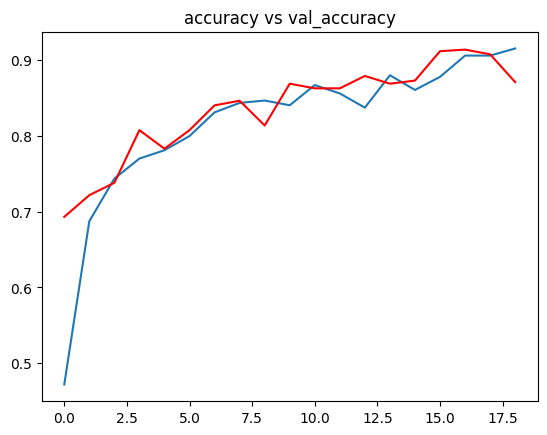

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title("accuracy vs val_accuracy")
plt.show()

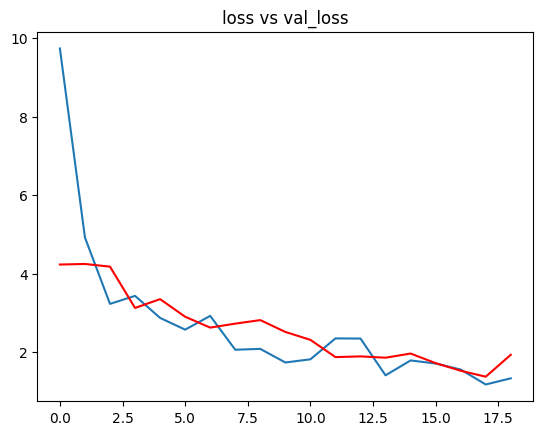

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("loss vs val_loss")
plt.show()

In [ ]:
#Load the best model

from keras.models import load_model

model = load_model("/content/best_model.h5")

In [ ]:
accuracy = model.evaluate_generator(val)[1]

print(f"The accuracy of the model is : {accuracy * 100}%")

<ipython-input-27-4ade63cab9b2>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy = model.evaluate_generator(val)[1]


The accuracy of the model is : 91.41104221343994%


In [ ]:
def prediction(path):
  img = load_img(path, target_size = (256,256))

  i = img_to_array(img)

  im = preprocess_input(i)

  img = np.expand_dims(im, axis = 0)

  pred = np.argmax(model.predict(img))

  print(pred)

In [ ]:
ref = dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))

In [ ]:
path = "/content/dataset/dataset/test/bacterial_leaf_blight-115-_JPG.rf.67a9edc664988aeadc97b2722c69b1ee.jpg"

prediction(path)

1/1 [==============================] - 2s 2s/step
0


In [ ]:
def prediction(path):
  img = load_img(path, target_size = (256,256))

  i = img_to_array(img)

  im = preprocess_input(i)

  img = np.expand_dims(im, axis = 0)

  pred = np.argmax(model.predict(img))

  print(f"The image belongs to : {ref[pred]}")

In [ ]:
path = "/content/dataset/dataset/test/bacterial_leaf_blight-115-_JPG.rf.67a9edc664988aeadc97b2722c69b1ee.jpg"

prediction(path)

1/1 [==============================] - 0s 27ms/step
The image belongs to : bacterial_leaf_blight


In [ ]:
path = "/content/dataset/dataset/test/healthy-96-_jpg.rf.2a29536e4de3c49ed5ef1f077518cf0b.jpg"
prediction(path)

1/1 [==============================] - 0s 132ms/step
The image belongs to : healthy


In [ ]:
path = "/content/dataset/dataset/test/leaf_blast-19-_jpg.rf.9a8e7a28f60cfd5a20e45a1a9e2ab0bf.jpg"
prediction(path)

1/1 [==============================] - 0s 66ms/step
The image belongs to : leaf_blast


In [ ]:
path = "/content/dataset/dataset/test/leaf_scald-248-_jpg.rf.007509b94ee90f8462dd51cee136424c.jpg"
prediction(path)

1/1 [==============================] - 0s 49ms/step
The image belongs to : leaf_scald


In [ ]:
path = "/content/dataset/dataset/test/narrow_brown-223-_jpg.rf.0f340220a469b4e231b991ed88d47279.jpg"
prediction(path)

1/1 [==============================] - 0s 19ms/step
The image belongs to : narrow_brown


In [ ]:
path = "/content/dataset/dataset/test/brown_spot-306-_jpg.rf.1b91552378bb7490e54cd0b28080db25.jpg"
prediction(path)

1/1 [==============================] - 0s 19ms/step
The image belongs to : brown_spot


In [ ]:
# import package that will generate the confusion matrix scores
from sklearn.metrics import confusion_matrix
# import packages that will help display the scores
import seaborn as sns
import pandas as pd

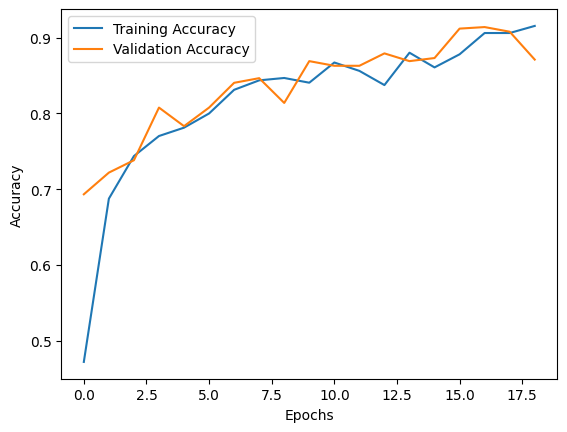

In [ ]:
plt.plot(his.history['accuracy'], label='Training Accuracy')
plt.plot(his.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load your trained model (replace 'your_model.h5' with your model's path)
model = tf.keras.models.load_model('/content/best_model.h5')

# Define an ImageDataGenerator for preprocessing (if needed)
test_datagen = test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale=1. / 255)

# Load your test data using the generator
test_generator = test_datagen.flow_from_directory(
    '/content/dataset/dataset/valid',
    target_size=(256, 256),
    batch_size=16,
    class_mode=None,
    shuffle=False
)

# Make predictions on the test data
predictions = model.predict(test_generator)
predicted_labels = tf.argmax(predictions, axis=1).numpy()


Found 489 images belonging to 6 classes.
31/31 [==============================] - 4s 90ms/step
